In [1]:
from kndetect.utils import get_data_dir_path
data_dir = get_data_dir_path()

# PLOT PCS

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
num_components_to_plot = 3

## KN PCs

In [4]:
PCs_mixed = np.load(data_dir + "/mixed_pcs.npy", allow_pickle=True).item()
PCs_mixed = PCs_mixed['all'][0:num_components_to_plot]

In [5]:
var_mixed_dict = np.load(data_dir+"/pc_var_ratio_mixed_pcs.npy", allow_pickle=True).item()
var_mixed = var_mixed_dict['all']

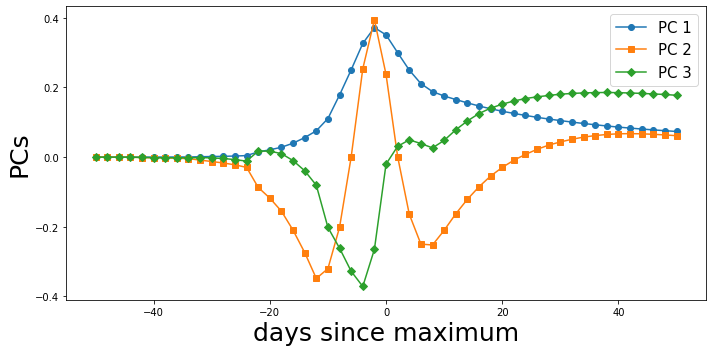

In [6]:
markers = ['o','s','D','*','x']
fig = plt.figure(figsize=(10,5))

for i in range(num_components_to_plot):

    PC = PCs_mixed[i]
    x = np.arange(0,102,2)-50
    plt.plot(x,PC,marker=markers[i],label = "PC "+str(i+1), )

plt.xlabel("days since maximum", fontsize = 25)
plt.ylabel("PCs", fontsize=25)

plt.rc('xtick', labelsize=17)    
plt.rc('ytick', labelsize=17) 

plt.rc('legend', fontsize=15)
plt.legend()
plt.tight_layout()

plt.show()

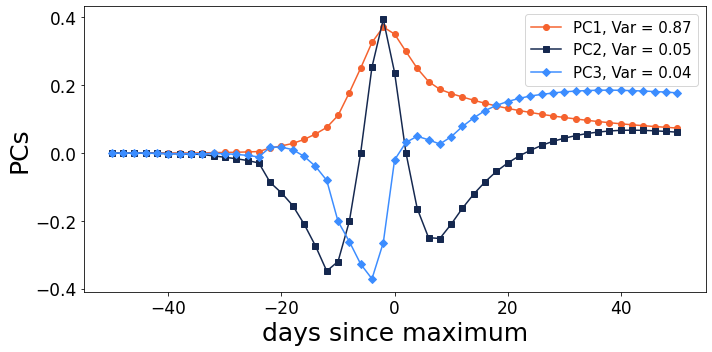

In [7]:
markers = ['o','s','D','*','x']
fig = plt.figure(figsize=(10,5))
colors = ['#F5622E', '#15284F', '#3C8DFF']

for i in range(num_components_to_plot):

    PC = PCs_mixed[i]
    x = np.arange(0,102,2)-50
    variance = "{:.2f}".format(var_mixed[i])
    plt.plot(x,PC,marker=markers[i],label = "PC"+str(i+1) +", Var = "+ variance, color=colors[i])

plt.xlabel("days since maximum", fontsize = 25)
plt.ylabel("PCs", fontsize=25)

plt.rc('xtick', labelsize=17)    
plt.rc('ytick', labelsize=17) 

plt.rc('legend', fontsize=15)
plt.legend()
plt.tight_layout()

fig.savefig("results/"+"PCs_mixed.pdf")

plt.show()

# PC interpolation

In [8]:
pcs_interpolated = np.load(data_dir + "/interpolated_mixed_pcs.npy", allow_pickle=True)

In [9]:
np.shape(pcs_interpolated)

(3, 401)

In [10]:
x_interpolated = np.linspace(-50, 50, num=401, endpoint=True)

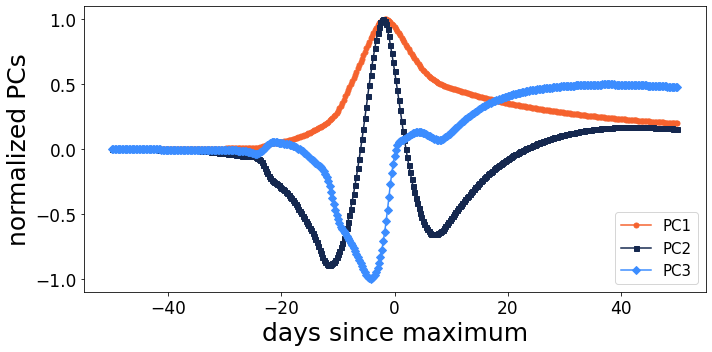

In [11]:
import numpy as np
fig = plt.figure(figsize=(10,5))
pc_names = ["PC1", "PC2", "PC3"]
colors = ['#F5622E', '#15284F', '#3C8DFF'] 
markers = ['o','s','D','*','x']
num_pc_components = 3

for i in range(num_pc_components):
    max_val = np.amax(np.abs(pcs_interpolated[i]))
    pcs_interpolated[i] = pcs_interpolated[i]/max_val
    PC = pcs_interpolated[i]
    plt.plot(x_interpolated, PC, label = pc_names[i], marker=markers[i], ms=5, color=colors[i])
    
ax = plt.gca()

plt.xlabel("days since maximum", fontsize=25)
plt.ylabel("normalized PCs", fontsize=25)
leg = ax.legend()

plt.rc('xtick', labelsize=17)    
plt.rc('ytick', labelsize=17) 

plt.rc('legend', loc='lower right', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("results/PCs_mixed_interpolated.pdf")

In [12]:
from astropy.table import Table

In [13]:
pc_generation_data = np.load(data_dir + "/PC_generation_dataset_mixed.npy", allow_pickle=True).item()

In [14]:
import matplotlib.pyplot as plt
def get_extracted_region(object_id, band, title):
    pos = np.where(np.asarray(pc_generation_data['object_ids']) == object_id)
    print(pos)
    band_data = pc_generation_data[band][pos]
    print(np.shape(band_data))
    x = np.linspace(-50, 50, num=51, endpoint=True)
    fig = plt.figure(figsize=(10,5))
    ax = plt.gca()
    #plt.axvline(x=0, ls="--", label="Day0", color='#15284F')
    
    plt.scatter(x, band_data.flatten(), c='#F5622E',label="r band")
    plt.axvspan(-2, +2, facecolor= '#D5D5D3', alpha=.25, lw=2, edgecolor ='#15284F', ls="--", label="region of max")
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.xlabel("Days since anchor", fontsize=30)
    plt.ylabel("FLUXCAL", fontsize=30)
    ax = plt.gca()
    leg = ax.legend(fontsize=17, loc='upper right')
    leg.set_title(title, prop={'size':17})
    plt.tight_layout()
    plt.savefig("results/perfect_single_band_extracted.pdf")

(array([5]),)
(1, 51)


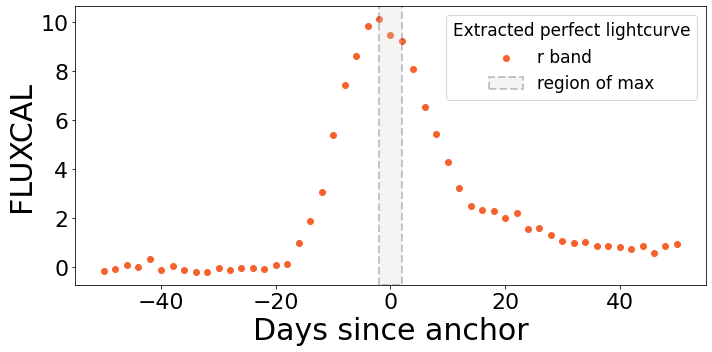

In [15]:
fig = get_extracted_region(2311, 'r', title='Extracted perfect lightcurve')
